In [12]:
#pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [13]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
 # Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Flatten the 28x28 images into 1D vectors
    layers.Dense(128, activation='relu'),      # Fully connected layer with 128 units and ReLU activation
    layers.Dropout(0.2),                       # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')     # Output layer with 10 units (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/Users/artatrana/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.8552 - loss: 0.4846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9537 - loss: 0.1538
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.9672 - loss: 0.1079
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9730 - loss: 0.0863
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9771 - loss: 0.0726
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.9729 - loss: 0.0896
Test accuracy: 0.9775999784469604
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step


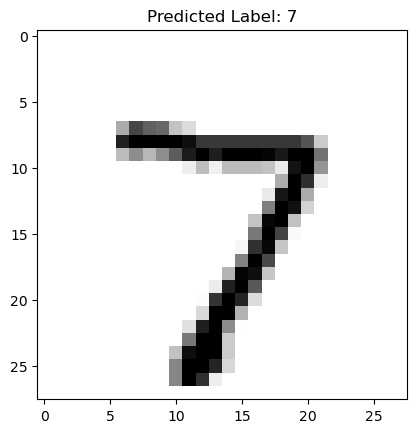

In [15]:
 # Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(x_test)

# Display the first test image and its predicted label
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.show()